__European Social Survey__

This is a biannual survey to measure the attitudes, beliefs and behavior patterns of the various populations in Europe. Using selected questions from the 2012 and 2014 editions, address the following questions. Here is the data file, and here is the codebook with information about the variable coding and content.

Note: the field idno should not be taken as a unique identifier.

1. Did people become less trusting from 2012 to 2014?
2. Did people become happier from 2012 to 2014?
3. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
4. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

__Ruff Figural Fluency Test__ 

This test provides information about nonverbal capacity for initiation, planning, and divergent reasoning. You can find the data here. The Casenr is a unique identifier.

Of particular use for comparing data points between measurements will be pivot() from Pandas.

1. Is there a significant difference in the number of unique designs drawn by the same participants from Measurement 2 to Measurement 3?
2. Is there a significant difference in the number of perseverative errors drawn by the same participants from Measurement 2 to Measurement 3?

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [3]:
europe = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ess_combined_2012_2014.csv")

In [4]:
europe.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3,3,10,5,8,5,4,2,60,1
1,CH,25,6,6,5,7,5,9,3,2,2,59,1
2,CH,26,6,1,8,8,8,7,6,3,1,24,2
3,CH,28,6,4,6,6,7,10,6,2,2,64,1
4,CH,29,6,5,6,7,5,8,7,2,2,55,1


## 1. Did people become less trusting from 2012 to 2014?

(0.9520939588546753, 1.4426241793085802e-34)
(0.9580563902854919, 9.222525335052542e-33)
DescribeResult(nobs=4071, minmax=(0, 10), mean=5.578481945467944, variance=4.893040545067073, skewness=-0.5431086926347095, kurtosis=-0.1210956960964813)
DescribeResult(nobs=4076, minmax=(0, 10), mean=5.5713935230618254, variance=4.927171652708959, skewness=-0.4601859476512641, kurtosis=-0.25006786100787215)


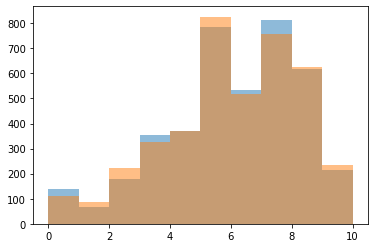

In [5]:
twenty12 = europe[europe['year'] == 6]

twenty14 = europe[europe['year'] == 7]

print(stats.shapiro(twenty12['ppltrst']))
print(stats.shapiro(twenty14['ppltrst']))

print(stats.describe(twenty12['ppltrst']))
print(stats.describe(twenty14['ppltrst']))

plt.hist(twenty12['ppltrst'], alpha = .5)
plt.hist(twenty14['ppltrst'], alpha = .5)
plt.show()

Shapiro tests are very sensitive to large samples. All other indications suggest this is a normal distribution

In [6]:
europe.groupby(['year']).agg(['count'])

,cntry,idno,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
,count,count,count,count,count,count,count,count,count,count,count,count
year,,,,,,,,,,,,
6,4071,4071,4071,4071,4071,4071,4071,4071,4071,4071,4071,4071
7,4076,4076,4076,4076,4076,4076,4076,4076,4076,4076,4076,4076


Distribution doesn't look normal

In [7]:
stats.ttest_ind(twenty12['ppltrst'], twenty14['ppltrst'])

Ttest_indResult(statistic=0.1443685081969842, pvalue=0.8852130548889106)

Failed to reject the null, there is no statistically significant difference

## 2. Did people become happier from 2012 to 2014?

(0.8943395018577576, 0.0)
(0.9060227870941162, 1.2611686178923354e-44)
DescribeResult(nobs=4071, minmax=(0, 10), mean=7.731515598133137, variance=3.0819524689826823, skewness=-1.1505518232802756, kurtosis=1.9055890346061979)
DescribeResult(nobs=4076, minmax=(0, 10), mean=7.6854759568204125, variance=2.840436853164115, skewness=-1.0296465664009635, kurtosis=1.5218046596567287)


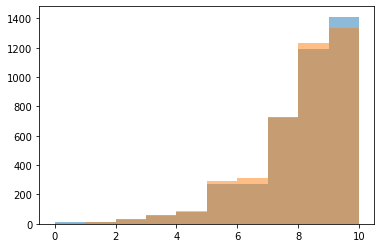

In [8]:
print(stats.shapiro(twenty12['happy']))
print(stats.shapiro(twenty14['happy']))

print(stats.describe(twenty12['happy']))
print(stats.describe(twenty14['happy']))

plt.hist(twenty12['happy'], alpha = .5)
plt.hist(twenty14['happy'], alpha = .5)
plt.show()

very skewed, not a normal distribution

In [9]:
stats.kruskal(
    twenty12['happy'],
    twenty14['happy'])

KruskalResult(statistic=3.725441202182227, pvalue=0.05358946830655459)

Very close p value, however looking at the two histograms I have decided to reject the null.

## 3. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [10]:
europe['cntry'].unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [11]:
selected = ['CH', 'CZ', 'DE', 'ES']

countries = twenty14[twenty14['cntry'].isin(selected)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE18657208>,
      dtype=object)

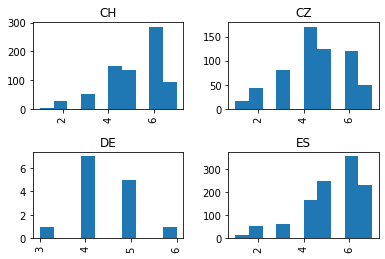

In [12]:
countries['sclmeet'].hist(by = countries['cntry'])

In [13]:
stats.kruskal(
    countries.loc[countries['cntry'] == 'CZ',['sclmeet']],
    countries.loc[countries['cntry'] == 'DE',['sclmeet']],
    countries.loc[countries['cntry'] == 'ES',['sclmeet']],
    countries.loc[countries['cntry'] == 'CH',['sclmeet']])

KruskalResult(statistic=131.71067637166692, pvalue=2.3142014154785973e-28)

Not all medians are even, time to boxplot to see the odd man out

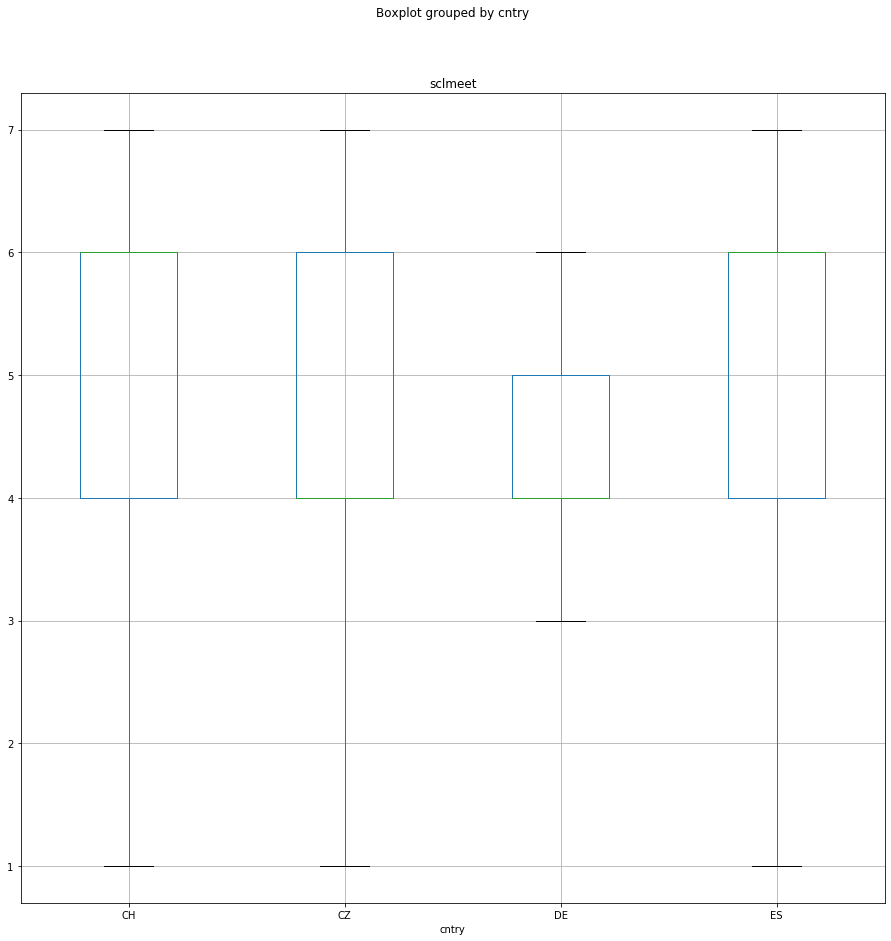

In [14]:
countries.boxplot('sclmeet', by = 'cntry', figsize = (15,15))

## 4. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE189ADCC8>,
      dtype=object)

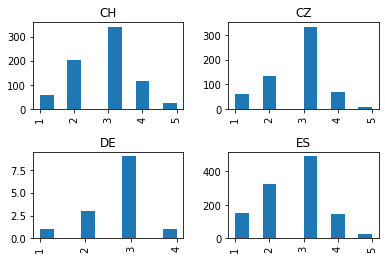

In [15]:
countries['sclact'].hist(by = countries['cntry'])

These look to be more normal distributions based on the eyeball test

In [17]:
stats.f_oneway(
    countries.loc[countries['cntry'] == 'CZ',['sclact']],
    countries.loc[countries['cntry'] == 'DE',['sclact']],
    countries.loc[countries['cntry'] == 'ES',['sclact']],
    countries.loc[countries['cntry'] == 'CH',['sclact']])

F_onewayResult(statistic=array([4.4857456]), pvalue=array([0.00380436]))

Based on these results there doesn't seem to be any significant differences between the groups

In [18]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = countries['sclact'],      # Data
                          groups = countries['cntry'],   # Groups
                          alpha=0.05) 


tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
CH,CZ,-0.0553,0.6634,-0.1836,0.073,False
CH,DE,-0.0704,0.9,-0.7026,0.5619,False
CH,ES,-0.1533,0.0021,-0.2639,-0.0426,True
CZ,DE,-0.0151,0.9,-0.6486,0.6185,False
CZ,ES,-0.098,0.142,-0.2159,0.0199,False
DE,ES,-0.0829,0.9,-0.7131,0.5473,False


# Ruff Figural Fluency Test

## 1. Is there a significant difference in the number of unique designs drawn by the same participants from Measurement 2 to Measurement 3?

In [19]:
rf = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/rfft.csv")
rf.head()

,Casenr,Age,Gender,Education,Measurement,Unique,Perseverative,Interval
0,1,74,Male,Lower secondary school (ISCED 2),Measurement 1 (2003-2006),32.0,1.0,Not applicable
1,1,74,Male,Lower secondary school (ISCED 2),Measurement 2 (2006-2008),35.0,0.0,2.842122556
2,1,74,Male,Lower secondary school (ISCED 2),Measurement 3 (2008-2012),50.5,14.5,2.201232033
3,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),26.0,3.0,Not applicable
4,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),47.0,3.0,2.762718362


In [20]:
rfmeasurements = rf.pivot(index='Casenr', columns='Measurement', values='Unique')
rfmeasurements.head()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,32.0,35.0,50.5
2,26.0,47.0,71.0
3,91.0,83.5,77.0
4,59.0,54.0,64.0
5,60.0,68.0,21.0


DescribeResult(nobs=2515, minmax=(-75.5, 68.5), mean=4.015506958250497, variance=342.2368318331855, skewness=-0.15837265462838976, kurtosis=0.7823714353134701)


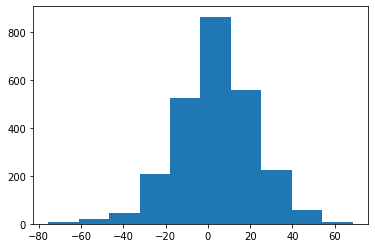

In [21]:
plt.hist(rfmeasurements['Measurement 3 (2008-2012)'] - rfmeasurements['Measurement 2 (2006-2008)'])
print(stats.describe(rfmeasurements['Measurement 3 (2008-2012)'] - rfmeasurements['Measurement 2 (2006-2008)']))

Looks normally distributed to me, I'll use a t-test to check for differences

In [22]:
stats.ttest_rel(rfmeasurements['Measurement 3 (2008-2012)'], rfmeasurements['Measurement 2 (2006-2008)'])

Ttest_relResult(statistic=10.88544039426271, pvalue=5.3585747477799544e-27)

There seem to be a difference between measurement two and three

## 2. Is there a significant difference in the number of perseverative errors drawn by the same participants from Measurement 2 to Measurement 3?

In [23]:
rfpersev = rf.pivot(index='Casenr', columns='Measurement', values='Perseverative')
rfpersev.head()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,1.0,0.0,14.5
2,3.0,3.0,0.5
3,11.0,21.0,17.0
4,49.0,39.0,11.0
5,14.0,16.0,0.0


(array([1.821e+03, 4.560e+02, 1.210e+02, 5.200e+01, 2.800e+01, 1.600e+01,
        1.300e+01, 3.000e+00, 4.000e+00, 1.000e+00]),
 array([  0.  ,  13.35,  26.7 ,  40.05,  53.4 ,  66.75,  80.1 ,  93.45,
        106.8 , 120.15, 133.5 ]),
 <a list of 10 Patch objects>)

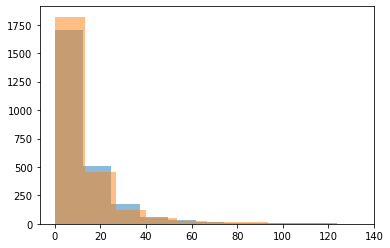

In [24]:
plt.hist(rfpersev['Measurement 3 (2008-2012)'], alpha = .5)
plt.hist(rfpersev['Measurement 2 (2006-2008)'], alpha = .5)

Looks fairly normal and the distributions are similar enough

In [25]:
stats.wilcoxon(rfpersev['Measurement 3 (2008-2012)'], rfpersev['Measurement 2 (2006-2008)'])

WilcoxonResult(statistic=1358373.0, pvalue=0.0006927535563546565)

We can reject the null